# HW 1 TOPICS IN ECONOMICS - GROUP 2

#### Aman Krishna
#### Tim Taylor
#### Yazmin Ramirez Delgado

## 1 ESG (40 points)

In [63]:

import warnings
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_line, scale_color_manual, scale_linetype_manual, theme_minimal, theme, element_text, labs, scale_y_continuous
warnings.filterwarnings("ignore", category=UserWarning, module="plotnine")

### 1. 

The file MSCI sample.csv contains MSCI ESG ratings for a random sample of firms. Following equations 1 and 2 of Pástor et al. (2022), compute the firm-level greenness measure, $ g_{i,t} $. In order to do the value-weighting (this will also apply when you construct the GMB portfolio), use the fields PRC (price) and SHROUT (shares outstanding) to compute the market cap of each firm at each date. Then, $\overline{G}$ is the market cap weighted average. You do not need to report anything at this step, but will need to use this measure later.

<span style="color:#406A5F"></span>
<span style="color:#406A5F">In the paper the unadjusted "greenness score" is given by:</span>

$G_{i, t-1} = \frac{-(10 - E\_score _{i, t - 1}) \times E\_weight _{i,t-1}}{100}$

<span style="color:#406A5F">This measures the most recent score to month t, where t-1 is between 1 and 12 months before the current period.</span>

<span style="color:#406A5F">The firm-level greenness score is given by:</span>

$g_{i,t} = G_{i,t} - \bar{G_{t}} $

<span style="color:#406A5F">Which is the difference between the firm's level of greenness and the aggregate weighted average</span>


In [64]:
# written by Tim Taylor
msci_sample_path =  r"data/MSCI_sample.csv"
msci_sample = pd.read_csv("MSCI_sample.csv")

# adding market cap column
msci_sample["MARKET_CAP"] = msci_sample.PRC * msci_sample.SHROUT

msci_sample.columns
msci_sample = msci_sample.dropna() # removing all NaN so the vector product is robust

In [65]:
# computing Gi,t-1
msci_sample[r'G'] =(-(10 - msci_sample.ENVIRONMENTAL_PILLAR_SCORE) * msci_sample.ENVIRONMENTAL_PILLAR_WEIGHT) / 100
msci_sample.loc[msci_sample.ISSUER_NAME.str.contains('Exxon Mobil Corporation')].tail(3)

,ISSUER_NAME,ISSUERID,AS_OF_DATE,IVA_INDUSTRY,INDUSTRY_ADJUSTED_SCORE,WEIGHTED_AVERAGE_SCORE,ENVIRONMENTAL_PILLAR_SCORE,ENVIRONMENTAL_PILLAR_WEIGHT,SOCIAL_PILLAR_SCORE,SOCIAL_PILLAR_WEIGHT,GOVERNANCE_PILLAR_SCORE,GOVERNANCE_PILLAR_WEIGHT,RET,PRC,SHROUT,MARKET_CAP,G
4617,Exxon Mobil Corporation,IID000000002127471,2013-08-01,Integrated Oil & Gas,4.0,4.3,3.7,55.0,5.4,20.0,4.7,25.0,-0.063573,93.75,4446376.0,4.16848e+08,-3.465
5026,Exxon Mobil Corporation,IID000000002127471,2013-09-01,Integrated Oil & Gas,4.0,4.3,3.7,55.0,5.4,20.0,4.7,25.0,-0.012850,87.16,4401632.0,3.83646e+08,-3.465
5446,Exxon Mobil Corporation,IID000000002127471,2013-10-01,Integrated Oil & Gas,4.0,4.2,4.0,54.8,5.0,21.9,3.9,23.3,0.041609,86.04,4401632.0,3.78716e+08,-3.288


<span style="color:#406A5F">Taking a look at the numbers in columns for ENVIRONMENTAL_PILLAR_SCORE and ENVIRONMENTAL_PILLAR_WEIGHT, we can see that they don't match up with those in the paper, even though the calculation method is the same, this is due to working with a sample and not the original dataset.</span>

<span style="color:#406A5F">In order to get G_bar, we would need to first get the weighted portfolio in each month. This is an issue, because all of the reporting dates take place in different reporting periods. For instance, Best Buy contains data until August 2013, but Exxon Mobil contains data until October 2013, so we may see a change in the "market portfolio" weights because Best Buy will not be included after August 2013.</span>

In [66]:
# Getting the weighted average by each month's weight, since G_bar is specific to each time period
msci_sample["MONTHLY_TOTAL_MARKET_CAP"] = msci_sample.groupby("AS_OF_DATE")["MARKET_CAP"].transform('sum')
msci_sample["WEIGHTED_MARKET_CAP"] = msci_sample.MARKET_CAP / msci_sample.MONTHLY_TOTAL_MARKET_CAP

# Creating G_bar
msci_sample["WEIGHTED_G"]  = (msci_sample.WEIGHTED_MARKET_CAP * msci_sample.G)
msci_sample["G_bar"] = msci_sample.groupby("AS_OF_DATE")["WEIGHTED_G"].transform('sum')

In [67]:
msci_sample.loc[msci_sample.ISSUER_NAME.str.contains('Exxon Mobil Corporation')].tail(3)

,ISSUER_NAME,ISSUERID,AS_OF_DATE,IVA_INDUSTRY,INDUSTRY_ADJUSTED_SCORE,WEIGHTED_AVERAGE_SCORE,ENVIRONMENTAL_PILLAR_SCORE,ENVIRONMENTAL_PILLAR_WEIGHT,SOCIAL_PILLAR_SCORE,SOCIAL_PILLAR_WEIGHT,...,GOVERNANCE_PILLAR_WEIGHT,RET,PRC,SHROUT,MARKET_CAP,G,MONTHLY_TOTAL_MARKET_CAP,WEIGHTED_MARKET_CAP,WEIGHTED_G,G_bar
4617,Exxon Mobil Corporation,IID000000002127471,2013-08-01,Integrated Oil & Gas,4.0,4.3,3.7,55.0,5.4,20.0,...,25.0,-0.063573,93.75,4446376.0,4.16848e+08,-3.465,3.70520e+09,0.11250,-0.38982,-1.92491
5026,Exxon Mobil Corporation,IID000000002127471,2013-09-01,Integrated Oil & Gas,4.0,4.3,3.7,55.0,5.4,20.0,...,25.0,-0.012850,87.16,4401632.0,3.83646e+08,-3.465,3.58281e+09,0.10708,-0.37103,-1.91865
5446,Exxon Mobil Corporation,IID000000002127471,2013-10-01,Integrated Oil & Gas,4.0,4.2,4.0,54.8,5.0,21.9,...,23.3,0.041609,86.04,4401632.0,3.78716e+08,-3.288,3.72147e+09,0.10177,-0.33460,-1.89782


In [68]:
# creating g_i,t 
msci_sample["g"] = msci_sample.G - msci_sample.G_bar

<span style="color:#406A5F">Checking </span>$w_t \cdot g_t = 0$ <span style="color:#406A5F">as per equation (3) of the paper.</span>

In [69]:
abs(round(msci_sample.dropna().WEIGHTED_MARKET_CAP @ msci_sample.dropna().g, 15))

2e-15

#### (a) (5 points) 
In your own words, explain what the unadjusted greenness score, $G_{i,t}$, measures. Make sure to mention why we need to include 
$E_{weight}$.


$\textcolor{#406A5F}{G_{i,t}} $ <span style="color:#406A5F"> measures the weighted amount of points of greenness score is needed to give that firm a perfect score in the environmental category. The weight</span> $\textcolor{#406A5F}E_{weight}$ <span style="color:#406A5F"> is essential to making sure the number is relative to the firm's overall exposure to Environmental risks. For instance, it may be easy for a company that relies on little fossil-fuel bulky capital to have a near-perfect G or "greenness points away from perfect" score, where 0 is perfect, so to measure the amount of improvement still needed, it makes sense to penalize firms with more exposure weight-wise if environmental exposure is a bigger part of their overall risk profile, e.g. a logistics company would be more exposed to environmental risk than an fund management firm, which may be more exposed to Social or Governance risks.</span>

<span style="color:#406A5F"></span>

#### (b) (5 points) 
Why does the paper focus on the adjusted greenness score?

<span style="color:#406A5F"> The paper focuses on the adjusted greenness score because it is concerned with measuring the overall returns to greenness across different asset classes. This is the "E" component only of ESG. Additionally, an unadjusted score wouldn't fully capture the potential current impact of a firm's good or bad greenness score, for reasons explored above. To add to that discussion, it also enables for relative comparison of how green and dirty firms perform over time, which is more in line with how investors would make their investment decisions rather than some arbitrary number that doesn't fully capture a firm's overall risk exposure to ESG issues.</span>


### 2. (10 points) 
Use the description in Section 4 of the paper to replicate Figure 3.

<span style="color:#406A5F">From the paper, it constructs a portfolio of the top third of greenness score companies with the bottom third of greenness score companies and measure their returns over time.</span>

<span style="color:#406A5F">These will be constraucted by first allocating a -1 for bottom 3rd, 1 for top 3rd, and 0 otherwise and then using normalized weights to get aggregate firm performance.</span>

In [70]:
# adding percentile indicators
percentiles = msci_sample.groupby("AS_OF_DATE")['g'].quantile([0.3, 0.7]).unstack(level=1)
msci_sample['Q_INDICATOR'] = msci_sample.apply(lambda row: 1 if row['g'] >= percentiles.at[row['AS_OF_DATE'], 0.7] else (-1 if row['g'] <= percentiles.at[row['AS_OF_DATE'], 0.3] else 0), axis=1)
msci_sample.head(3)

# computing the percentage returns
msci_sample["MONTHLY_RETURNS"] = msci_sample.groupby("ISSUER_NAME")["PRC"].pct_change()

# checking for Exxon
msci_sample.loc[msci_sample.ISSUER_NAME.str.contains('Exxon Mobil Corporation')][["ISSUER_NAME", "AS_OF_DATE", "MONTHLY_RETURNS", 'Q_INDICATOR']].tail(3)

,ISSUER_NAME,AS_OF_DATE,MONTHLY_RETURNS,Q_INDICATOR
4617,Exxon Mobil Corporation,2013-08-01,0.03763,-1
5026,Exxon Mobil Corporation,2013-09-01,-0.07029,-1
5446,Exxon Mobil Corporation,2013-10-01,-0.01285,-1


In [71]:
def get_monthly_returns(data = msci_sample.set_index("AS_OF_DATE").dropna(), Q = 1, name = "Clean_Rets"):
    """ 
        This computes the portfolio returns and cumulative returns based on the quantile indicator "Q"
    """
    # removing the first dates of percent change
    weights = data[data.Q_INDICATOR == Q]["MARKET_CAP"] / data[data.Q_INDICATOR == Q].groupby("AS_OF_DATE")["MARKET_CAP"].transform('sum')
    returns = data[data.Q_INDICATOR == Q]["MONTHLY_RETURNS"]
    df = pd.DataFrame({f"{name}": (weights * returns).groupby("AS_OF_DATE").sum()})
    df = df[(df.index > '2012-10-01') & (df.index < '2021-01-01')] # the sample starts in Nov 2012 and ends dec 2020
    df[f"{name}_Cumulative"] = (1 + df[f"{name}"]).cumprod() - 1
    return df

# Clean Returns
rets_clean = get_monthly_returns(data = msci_sample.set_index("AS_OF_DATE"), Q = 1, name = "Clean_Rets")

# Dirty Returns
rets_dirty = get_monthly_returns(data = msci_sample.set_index("AS_OF_DATE"), Q = -1, name = "Dirty_Rets")

df_returns = pd.concat([rets_clean, rets_dirty], axis = 1)
df_returns

,Clean_Rets,Clean_Rets_Cumulative,Dirty_Rets,Dirty_Rets_Cumulative
AS_OF_DATE,,,,
2012-11-01,0.01792,0.01792,-0.00482,-0.00482
2012-12-01,0.00343,0.02141,-0.01303,-0.01778
2013-01-01,0.04390,0.06625,-0.00274,-0.02048
2013-02-01,0.08212,0.15381,0.04773,0.02628
2013-03-01,0.01397,0.16993,0.00291,0.02926
...,...,...,...,...
2020-08-01,0.10253,3.12552,0.03077,0.36210
2020-09-01,-0.04372,2.94517,0.01907,0.38807
2020-10-01,-0.06575,2.68578,-0.03311,0.34212


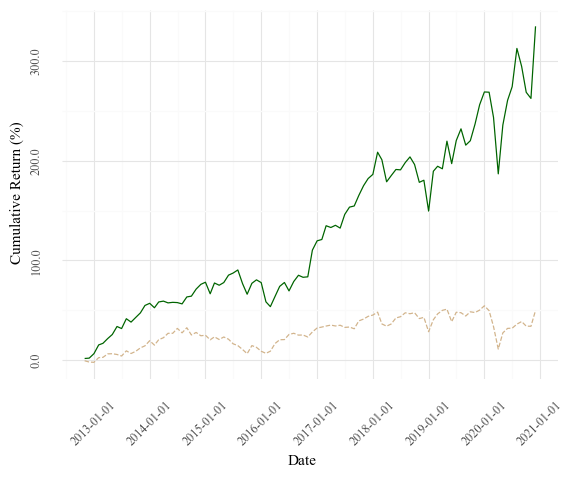

<ggplot: (702644962)>

In [72]:
df_returns.index = pd.to_datetime(df_returns.index)
df = df_returns

line_styles = ['solid', 'dashed']
line_colors = ['#006400', '#D2B48C'] # green and brown

plot = (
    ggplot(df.reset_index(), aes(x='AS_OF_DATE'))
    + geom_line(aes(y='Clean_Rets_Cumulative'), color=line_colors[0], linetype=line_styles[0])
    + geom_line(aes(y='Dirty_Rets_Cumulative'), color=line_colors[1], linetype=line_styles[1])
    + scale_color_manual(values=line_colors)
    + scale_linetype_manual(values=line_styles)
    + labs(y='Cumulative Return (%)', x='Date')
    + theme_minimal()
    + scale_y_continuous(labels=lambda x: x * 100)  
    + theme(axis_text_x=element_text(angle=45, family='Times New Roman'),  
            axis_text_y=element_text(angle=90, family='Times New Roman'),  
            legend_title=element_text(family='Times New Roman'))
    + theme(axis_title=element_text(family='Times New Roman'))
    # add a legend for the two lines
    + theme(legend_title="123", legend_position=(0.0, 0.0), legend_direction='horizontal')
    
)
plot

### 3. (10 points) 
What is the monthly return and Sharpe ratio of the green minus brown portfolio?

In [73]:
FF_path = r"data/F-F_Research_Data_Factors.csv"
FF_data = pd.read_csv("F-F_Research_Data_Factors.CSV",skiprows=2,nrows=1154, sep = ',')
FF_data = FF_data.set_index("Unnamed: 0")
FF_data
### In the original dataset I removed the yearly data, headers, and footers ###
FF_data[(FF_data.index > 201210) & (FF_data.index < 202101)][["RF"]]

,RF
Unnamed: 0,
201211,0.01
201212,0.01
201301,0.00
201302,0.00
201303,0.00
...,...
202008,0.01
202009,0.01
202010,0.01


In [74]:
df_returns["Green_minus_Brown"] = df_returns.Clean_Rets - df_returns.Dirty_Rets
display(df_returns[["Green_minus_Brown"]])

GMB_minus_RF = df_returns["Green_minus_Brown"].reset_index(drop=True) - (FF_data[(FF_data.index > 201210) & (FF_data.index < 202101)]["RF"]).reset_index(drop=True) / 100
# The sharpe ratio is calculated by taking the difference between the GMB and adjusted RF rate and dividing by the stdev of GMB
print("Sharpe Ratio of GMB: ", round(float((GMB_minus_RF.mean()) / df_returns[["Green_minus_Brown"]].std()),4))

,Green_minus_Brown
AS_OF_DATE,
2012-11-01,0.02274
2012-12-01,0.01646
2013-01-01,0.04664
2013-02-01,0.03439
2013-03-01,0.01106
...,...
2020-08-01,0.07176
2020-09-01,-0.06278
2020-10-01,-0.03264


Sharpe Ratio of GMB:  0.3024


<span style="color:#406A5F">The Sharpe ratio is a little bit lower than in the paper, this is likely due to a combination of the data included in the sample and the assumptions I made earlier regarding when to exclude missing data. </span>

### 4. (10 points) 
How does Pástor et al. (2022) explain that green stocks outperform bad stocks when the theoretical model from Pástor et al. (2021) suggests that brown stocks should outperform? Make sure to focus on the distinction between expected and realized returns.

<span style="color:#406A5F">In Pástor et al.'s 2022 paper, they find that the GMB portfolio returns have a significant positive return, however they note that when you control for the increased level of environmental issue awareness and concern level, a lot of these returns disappear. What they noted in their 2021 paper was that the green stocks should have a lower expected return as investors who buy them often make their decisions on measures of utility that include more than just the expected profitability. They reconcile this supposed flaw with a wider discussion about expected versus realized returns and note that even though we saw over the sample period that greener firms had a very high realized return, it does does disappear when you control for other factors, like environmental concern.</span>

<span style="color:#406A5F">This is because even though realized returns are often used as a proxy for expected returns, they can often diverge as not only are there other proxies for expected returns, but there are other factors that should be controlled for that is missing in the usual assumptions for using realized returns as expected returns. Additionally, they note strange behaviour in price adjustment in large versus small firms, where small-cap firms tend to underreact to envronmental news, which suggests that green investing is not spread evenly. Overall, they are careful to note that their findings indicate this period of outperformance should not be interpreted to suggest that green firms should expect higher returns, and instead that these returns are driven by other factors.</span>


## 2 Climate Risk (60 points)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math as m 
from arch import arch_model
from arch.univariate import GARCH, EWMAVariance 
from sklearn import linear_model
import scipy.stats as stats
from statsmodels.regression.rolling import RollingOLS
import seaborn as sns
import warnings
from scipy.stats import norm
pd.set_option("display.precision", 5)
warnings.filterwarnings("ignore")

The first two parts of this problem are just to give you a chance to explore the industry returns data. The third part is specifically related to climate risk

### 1 (5 points) 
The file 49_Industry_Portfolios.csv contains monthly returns of stocks in 49 different industries. Import this file into your program of choice. Restrict the sample to start in January 2004 and end in June 2018. Calculate the cumulative return of each industry over the sample period. Which were the three highest and three lowest performing industries in this sample?

In [76]:
# written by Aman Krishna and Yazmin Ramirez Delgado
# Reading in the data and dropping the first 11 rows and restricting the data to 1154 rows which has the value weighted monthly returns for the 49 industries
df = pd.read_csv("49_Industry_Portfolios.CSV", skiprows=11, index_col=0, nrows=1154)

df = df.dropna()

#### Restricting Sample to provided dates

In [77]:
# Change the index to datetime of the form YYYYMM
df.index = pd.to_datetime(df.index, format='%Y%m')

#Change the Index column name to Date
df.index.name = 'Date'

#Restrict the sample to start between January 2004 and June 2018
df = df.loc['2004-01-01':'2018-06-01']

df

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,-1.34,...,-1.09,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87
2004-02-01,2.10,6.15,5.79,2.59,3.82,3.42,0.81,1.06,2.99,5.74,...,6.51,0.07,2.26,6.75,7.11,2.16,4.21,2.32,2.94,-2.08
2004-03-01,4.05,0.74,4.01,-0.21,-4.03,-3.63,2.27,-0.22,1.56,3.33,...,-0.12,-0.54,2.18,-0.13,0.76,-0.38,-0.63,1.49,-2.16,-5.01
2004-04-01,-0.21,3.05,4.66,0.38,1.91,-5.81,-1.81,0.04,2.22,-2.13,...,-2.34,0.21,0.91,-3.21,-0.83,-5.54,-0.78,-6.85,-7.77,-1.83
2004-05-01,1.21,-2.49,2.13,2.25,-12.61,2.89,0.46,0.37,1.52,0.04,...,4.96,2.18,0.16,0.71,-3.03,2.54,0.90,2.47,0.60,3.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1.20,-6.77,-8.39,-6.76,-6.62,0.70,1.12,-3.50,-6.27,-1.95,...,-3.76,-6.66,-5.41,-4.72,-4.11,-2.13,-4.44,-3.71,-1.26,-4.72
2018-03-01,-4.92,-2.25,-0.41,1.27,-1.65,-9.23,0.52,-0.19,2.13,0.64,...,-1.54,0.53,-1.04,-3.25,-0.41,-4.62,-2.13,4.55,-1.35,-3.56
2018-04-01,7.99,-3.51,-0.79,-4.29,-14.16,6.42,3.09,-0.46,-5.35,3.16,...,-1.39,0.49,0.82,4.29,3.53,1.11,3.52,-1.29,-1.57,-1.75


#### Calculating Cumulative Return of each Insdustry over the sample period

In [78]:
# Calculate the cumulative monthly returns by summing the monthly returns
df_cumulative = df.cumsum()

df_cumulative_ranked = df_cumulative.iloc[-1]

In [79]:
df_cumulative

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,-1.34,...,-1.09,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87
2004-02-01,-0.72,7.09,11.36,-0.31,5.87,3.31,1.12,2.16,5.18,4.40,...,5.42,-4.00,5.21,6.55,7.59,4.80,8.93,8.64,6.80,4.79
2004-03-01,3.33,7.83,15.37,-0.52,1.84,-0.32,3.39,1.94,6.74,7.73,...,5.30,-4.54,7.39,6.42,8.35,4.42,8.30,10.13,4.64,-0.22
2004-04-01,3.12,10.88,20.03,-0.14,3.75,-6.13,1.58,1.98,8.96,5.60,...,2.96,-4.33,8.30,3.21,7.52,-1.12,7.52,3.28,-3.13,-2.05
2004-05-01,4.33,8.39,22.16,2.11,-8.86,-3.24,2.04,2.35,10.48,5.64,...,7.92,-2.15,8.46,3.92,4.49,1.42,8.42,5.75,-2.53,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,165.46,139.59,184.28,149.37,233.75,91.10,212.32,52.55,107.81,190.58,...,197.16,170.22,146.16,160.22,203.67,93.00,141.14,126.05,141.76,97.33
2018-03-01,160.54,137.34,183.87,150.64,232.10,81.87,212.84,52.36,109.94,191.22,...,195.62,170.75,145.12,156.97,203.26,88.38,139.01,130.60,140.41,93.77
2018-04-01,168.53,133.83,183.08,146.35,217.94,88.29,215.93,51.90,104.59,194.38,...,194.23,171.24,145.94,161.26,206.79,89.49,142.53,129.31,138.84,92.02


#### Three highest and three lowest performing industries in this sample

In [80]:
print("The three top performing industries are\n",df_cumulative_ranked.sort_values(ascending=False).head(3))
print("----------------------------------------------")
print("The three lowest performing industries are\n",df_cumulative_ranked.sort_values(ascending=False).tail(3))

The three top performing industries are
 Ships    282.98
Fun      230.45
Guns     228.34
Name: 2018-06-01 00:00:00, dtype: float64
----------------------------------------------
The three lowest performing industries are
 PerSv    80.27
Gold     70.70
Books    54.93
Name: 2018-06-01 00:00:00, dtype: float64


<span style="color:purple">**Top Performing Industries**: <br>
<br>
**Ships**: Shipping is an industry that may be exposed to climate change risk. The shipping industry may have benefited from increasing global trade during this period. As the world economy grew, the demand for transporting goods across borders also increased, which could have led to higher profitability for shipping companies.<br>
<br>
**Fun**: This industry includes various entertainment and leisure businesses. During times of economic growth, people tend to spend more on entertainment and leisure, leading to increased revenues for companies in this sector. This might be one reason why we see it as a top performer.<br>
<br>
**Guns**: The strong performance of this industry may not have a direct link to climate change concerns. Increased demand for firearms might have driven higher stock returns for companies in this industry.<br></span>

<span style="color:blue">**Lowest Performing Industries:**<br>
<br>
**PerSv**: The poor performance of the Personal Services industry may not necessarily be driven by climate change concerns. With the automation and industrial development, many personal services have become redundant and moot.<br>
<br>
**Gold**: The Gold industry typically reacts to various economic and geopolitical factors. It is typically considered a safe haven asset and behaves as somewhat of a hedge to the equity world. We do not see an immediate climate change connection.<br>
<br>
**Books** : The decline in the "Books" industry's performance could be attributed to the rise of digital media and e-books, which disrupted traditional publishing. Also, books comes from trees.<br></span>

### 2 (10 points) 
For each industry, calculate the standard deviation of returns. Use this to calculate the Sharpe ratio. Which industries have the three highest and three lowest Sharpe ratios? How do these compare to those with the highest and lowest returns?

#### Calculating the standard deviation of returns for each industry

In [81]:
df_std = df.std()
df_std

Agric     6.50389
Food      3.35111
Soda      5.65172
Beer      3.48047
Smoke     4.87271
Toys      6.15652
Fun       7.99779
Books     6.08752
Hshld     3.67395
Clths     5.70489
Hlth      5.12025
MedEq     4.57003
Drugs     3.86852
Chems     5.87956
Rubbr     5.89881
Txtls     9.10321
BldMt     6.77057
Cnstr     6.84579
Steel     8.51674
FabPr     8.02063
Mach      6.55334
ElcEq     6.06625
Autos     7.97213
Aero      5.26366
Ships     7.59158
Guns      5.09859
Gold     10.66172
Mines     9.22052
Coal     12.93151
Oil       5.80232
Util      3.57289
Telcm     4.24915
PerSv     5.90617
BusSv     4.46116
Hardw     5.91714
Softw     4.81853
Chips     5.79308
LabEq     5.15546
Paper     4.99164
Boxes     5.31394
Trans     5.04236
Whlsl     4.56167
Rtail     4.10749
Meals     4.03878
Banks     6.12945
Insur     5.30195
RlEst     8.75819
Fin       6.32057
Other     5.55620
dtype: float64

#### Calculating the Sharpe ratio for each industry

In [82]:
# Use the df_std and df_cumulative_ranked to calculate the Sharpe Ratio
df_sharpe = df_cumulative_ranked / df_std

df_sharpe

Agric    25.73689
Food     41.48180
Soda     32.95104
Beer     42.97694
Smoke    44.97293
Toys     15.39507
Fun      28.81421
Books     9.02337
Hshld    29.37712
Clths    36.03402
Hlth     25.64716
MedEq    38.08070
Drugs    37.47943
Chems    32.64020
Rubbr    30.49087
Txtls    22.38550
BldMt    24.24906
Cnstr    16.12378
Steel    15.22883
FabPr    19.53960
Mach     28.52132
ElcEq    22.04328
Autos    12.67165
Aero     40.98861
Ships    37.27552
Guns     44.78491
Gold      6.63120
Mines    22.17770
Coal      7.11595
Oil      27.23739
Util     41.91003
Telcm    31.23211
PerSv    13.59088
BusSv    37.19882
Hardw    26.62264
Softw    37.90371
Chips    26.80958
LabEq    37.16057
Paper    25.44654
Boxes    35.49722
Trans    34.20024
Whlsl    32.39604
Rtail    40.65505
Meals    50.03986
Banks    14.63591
Insur    26.72790
RlEst    14.15589
Fin      21.50440
Other    16.14772
dtype: float64

#### Three highest and three lowest sharpe ratio industries in this sample

In [83]:
print("The three top Sharpe Ratio industries are\n",df_sharpe.sort_values(ascending=False).head(3))
print("----------------------------------------------")
print("The three lowest Sharpe Ratio industries are\n",df_sharpe.sort_values(ascending=False).tail(3))

The three top Sharpe Ratio industries are
 Meals    50.03986
Smoke    44.97293
Guns     44.78491
dtype: float64
----------------------------------------------
The three lowest Sharpe Ratio industries are
 Books    9.02337
Coal     7.11595
Gold     6.63120
dtype: float64


<span style="color:blue">The **Sharpe ratio** measures the risk-adjusted performance of an investment or portfolio. It considers not only the returns generated but also the level of risk taken to achieve those returns.</span> <br>
<br>
<span style="color:purple">**Top Sharpe Ratio Industries:** <br>
<br>
**Meals**: The returns from this industry were not only high but were achieved with relatively lower risk. Possible reasons could include stable demand for food-related products.<br>
<br>
**Smoke**: This industry, which likely includes tobacco companies, also shows a high Sharpe ratio. This could be due to the relatively stable and consistent demand for tobacco products, which can lead to steady cash flows and returns.<br>
<br>
**Guns**: The firearms industry has a high Sharpe ratio, indicating that it offered strong risk-adjusted returns. This may be linked to factors such as political events, concerns about personal safety, and changes in gun regulations, which could drive demand for firearms.<br></span>
<br>
<span style="color:blue">
**Bottom Sharpe Ratio Industries**:<br>
<br>
**Books**: This industry has the lowest Sharpe ratio among the listed industries. This suggests that the returns generated by this industry were relatively low compared to the level of risk taken. The decline of traditional print publishing due to the rise of digital media might have contributed to this lower risk-adjusted performance.<br>
<br>
**Coal**: The coal industry's low Sharpe ratio reflects the challenges faced by this sector during the period. Factors like environmental concerns, the shift towards cleaner energy sources, and reduced demand for coal likely contributed to both lower returns and higher risk.<br>
<br>
**Gold**: Gold, which is traditionally considered a safe-haven asset, had the second-lowest Sharpe ratio. This may be due to a combination of lower returns compared to equities and the relatively low risk associated with gold investments during this period.<br>
<br>
In comparing the rankings based on cumulative monthly returns and Sharpe ratios, we can see that industries like Guns, Books, and Gold are in a similar extreme end of the spectrum. </span>


### 3 
In the next sub-questions, we are going to focus on days where attention to climate change is high. We will identify these days in two ways: using Google Trends searches and using the Ardia et al. (2020) climate concerns data.

#### (a) (20 points) 
Go to https://trends.google.com/trends/?geo=US and go to the page for the Climate Change topic.8 Change the timing to 2004-present and download the data.

#### Loading the Google Trends data. The range is 0-100.

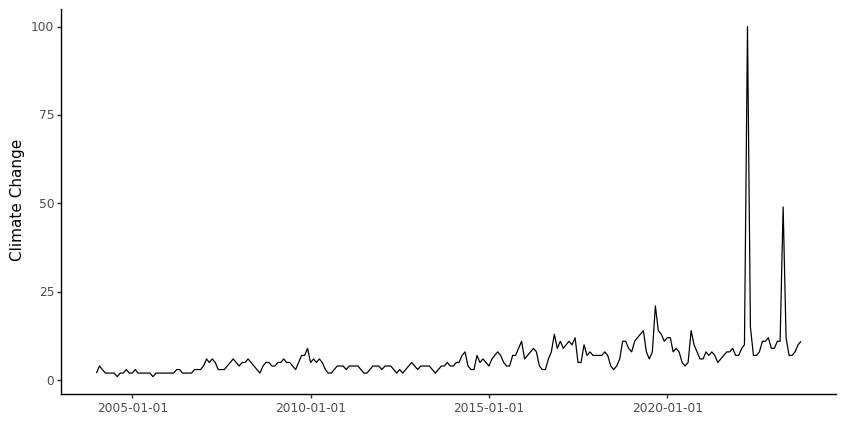

<ggplot: (703924218)>

In [84]:
df_google_trends = pd.read_csv("multiTimeline.csv",skiprows=2, index_col=0, parse_dates=True)

#Rename column to climate change
df_google_trends = df_google_trends.rename(columns={'climate change: (United States)': 'Climate Change'})

#PLot the google trends data using ggplot
p1 = (ggplot(df_google_trends, aes(x=df_google_trends.index, y="Climate Change"))+ p9.geom_line() + p9.theme_classic() + p9.theme(figure_size=(10, 5)))
p1

##### i. 
Pick three months where this measure was high. Can you find any news events from those months that might be leading Google searches for climate change to be particularly high? Discuss.

In [85]:
df_google_trends

,Climate Change
Month,
2004-01-01,2
2004-02-01,4
2004-03-01,3
2004-04-01,2
2004-05-01,2
...,...
2023-06-01,7
2023-07-01,7
2023-08-01,8


In [86]:
# Rank the google trends data to find the top 3 dates
df_google_trends.sort_values(by='Climate Change', ascending=False).head(3)

,Climate Change
Month,
2022-04-01,100
2023-04-01,49
2019-09-01,21


<span style="color:blue"> Based on above graph and dates, we see the top three dates were April of 2022, 2023 and September of 2019. <br>We went ahead and tried to find any news events that might be leading Google searches for climate change to be particularly high. We found the following news articles that might be the reason for the spike in Google searches for climate change.<br>1. The April 2022 global surface temperature was 0.85°C (1.53°F) above the 20th century average and tied with 2010 as the fifth highest for April in the 143-year record. - https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/202204#:~:text=The%20April%202022%20global%20surface,in%20the%20143%2Dyear%20record <br> </span>
<span style="color:purple">2. The Southern Hemisphere had its warmest April and warmest month on record. As ocean temperatures set a record high for the month of April.- https://www.climate.gov/news-features/understanding-climate/global-climate-summary-april-2023#:~:text=Highlights,sea%20ice%20extent%20on% <br>3.Globally, September 2019 was roughly 1.02 degrees Fahrenheit warmer than the average from 1981-2010, "making it the warmest September in our data record, although virtually on a par with 2016," the group said in a statement. -USA TODAY
So it can be seen that the spike in Google searches for climate change is due to the increase in global temperature and global warming related news. </span>

##### ii. 
Merge the Google Trends data with the data from 49_Industry_Portfolios.csv. For each industry, regress returns on the Google Trends Climate Change topic score. Create a table with three columns: column 1 has the industry name, column 2 has the OLS regression coefficient and column 3 has the p-value for that coefficient. Sort the table from largest to smallest coefficient.

In [87]:
# Merge the google trends data with the industry data
df_merged = df.merge(df_google_trends, left_index=True, right_index=True)
df_merged

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Climate Change
2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,-1.34,...,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87,2
2004-02-01,2.10,6.15,5.79,2.59,3.82,3.42,0.81,1.06,2.99,5.74,...,0.07,2.26,6.75,7.11,2.16,4.21,2.32,2.94,-2.08,4
2004-03-01,4.05,0.74,4.01,-0.21,-4.03,-3.63,2.27,-0.22,1.56,3.33,...,-0.54,2.18,-0.13,0.76,-0.38,-0.63,1.49,-2.16,-5.01,3
2004-04-01,-0.21,3.05,4.66,0.38,1.91,-5.81,-1.81,0.04,2.22,-2.13,...,0.21,0.91,-3.21,-0.83,-5.54,-0.78,-6.85,-7.77,-1.83,2
2004-05-01,1.21,-2.49,2.13,2.25,-12.61,2.89,0.46,0.37,1.52,0.04,...,2.18,0.16,0.71,-3.03,2.54,0.90,2.47,0.60,3.52,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1.20,-6.77,-8.39,-6.76,-6.62,0.70,1.12,-3.50,-6.27,-1.95,...,-6.66,-5.41,-4.72,-4.11,-2.13,-4.44,-3.71,-1.26,-4.72,7
2018-03-01,-4.92,-2.25,-0.41,1.27,-1.65,-9.23,0.52,-0.19,2.13,0.64,...,0.53,-1.04,-3.25,-0.41,-4.62,-2.13,4.55,-1.35,-3.56,7
2018-04-01,7.99,-3.51,-0.79,-4.29,-14.16,6.42,3.09,-0.46,-5.35,3.16,...,0.49,0.82,4.29,3.53,1.11,3.52,-1.29,-1.57,-1.75,8
2018-05-01,1.93,-0.86,-1.30,-1.19,-1.87,0.81,9.61,0.70,-0.25,4.21,...,4.85,1.56,1.37,-1.75,1.08,-1.11,-3.64,0.37,-0.47,7


In [88]:
def regression(df, regressor='Climate Change'):
    # Create a dataframe to store the results
    df_results = pd.DataFrame(columns=['Industry', 'Coefficient', 'P-Value'])
    
    # Loop through each industry
    for industry in df.columns:
        # Create a dataframe with the industry and google trends data
        df_industry = df[[industry, regressor]]
        
        # Rename the columns
        df_industry.columns = ['Returns', 'Google Trends']
        
        # Drop any missing values
        df_industry = df_industry.dropna()
        
        # Run the regression
        model = sm.OLS(df_industry['Returns'], sm.add_constant(df_industry['Google Trends']))
        results = model.fit()
        
        # Store the results in the dataframe
        df_results = df_results.append({'Industry': industry, 'Coefficient': results.params['Google Trends'], 'P-Value': results.pvalues['Google Trends']}, ignore_index=True)
        
    return df_results

df_results = regression(df_merged, regressor='Climate Change')

# Sort the table from largest to smallest coefficient. Note: we are removing the first row because it is the Climate Change regressor itself.
df_results.sort_values(by='Coefficient', ascending=False)[1:]

,Industry,Coefficient,P-Value
22,Autos,0.35786,0.16441
18,Steel,0.30430,0.26891
20,Mach,0.23978,0.25753
44,Banks,0.22550,0.25491
19,FabPr,0.22388,0.38807
40,Trans,0.21283,0.19123
28,Coal,0.21261,0.61145
36,Chips,0.20966,0.26276
13,Chems,0.20016,0.29226
37,LabEq,0.18126,0.27668


##### iii. 
Comment on the ordering of the industries. Is it in line with what you would have expected?

<span style="color:blue"> **Industries with Positive Coefficients**: <br>
<br>
**Autos**: This industry has the highest positive coefficient. This suggests that increased interest in climate change on Google Trends may have a positive impact on the automobile industry, possibly due to greater demand for environmentally friendly or electric vehicles.<br>
<br>
**Steel, Mach, Banks, FabPr**: These industries also have positive coefficients, implying that they might benefit from higher climate change awareness. For example, the steel industry might see increased demand for materials used in renewable energy infrastructure.<br>
<br>
<span style="color:purple">
**Trans, Coal, Chips, Chems, LabEq, Aero**: These industries also have positive coefficients but to a slightly lesser degree. They may experience some positive effects from heightened climate change concerns. <br>
<br>
**Industries with Negative Coefficients**: <br>
<br>
**Smoke, Food, Hshld, Util, Smoke**: These industries have negative coefficients, indicating that higher Google Trends Climate Change scores are associated with lower returns. This suggests that industries like tobacco, food, and utilities might face challenges or reduced demand in the context of increasing climate change awareness. For example, tobacco companies could face increased regulatory scrutiny.<br>
<br>For the most part these results align with the expectations. Though, we would not have expected Banks to be one of the highest coefficient industries.
</span>

##### iv. 
Repeat i.-iii. for two new climate change-related Google search terms of your choice. One of these terms should be related to physical risk (e.g. heat wave, hurricane, wildifre) and one should be related to transition risk (e.g. environmental regulation, carbon tax, cap and trade).

#### Physical Risk - "Sea Level"

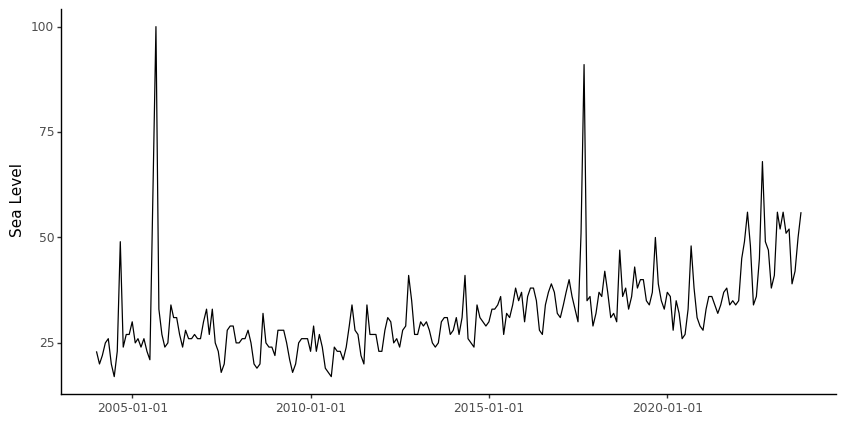

<ggplot: (703918728)>

In [89]:
df_google_trends1 = pd.read_csv("multiTimeline1.csv",skiprows=2, index_col=0, parse_dates=True)

#Rename column to climate change
df_google_trends1 = df_google_trends1.rename(columns={'Sea Level: (United States)': 'Sea Level'})
#PLot the google trends data using ggplot
p2 = (ggplot(df_google_trends1, aes(x=df_google_trends1.index, y="Sea Level"))+ p9.geom_line() + p9.theme_classic() + p9.theme(figure_size=(10, 5)))
p2

In [90]:
# Rank the google trends data to find the top 3 dates
df_google_trends1.sort_values(by='Sea Level', ascending=False).head(3)

,Sea Level
Month,
2005-09-01,100
2017-09-01,91
2022-09-01,68


<span style="color:blue"><br>
Based on above dates, September 2005, 2017 and 2022- <br>
<br>1. Sep 2005: There are several news articles talking about severe Hurricanes in New Orleans. - https://edition.cnn.com/2005/WEATHER/09/01/orleans.levees/index.html <br>
2. Sep 2017: There are several news articles talking about Hurricane Irma and Hurricane Maria. - https://www.cnn.com/2017/09/06/us/hurricane-irma-puerto-rico-florida/index.html <br>
3. Sep 2022: There are several articles about Hurrican Ian and Hurrican Julia. -https://yaleclimateconnections.org/2022/09/ian-smashes-into-southwest-florida-with-historic-force/ <br>

In [91]:
# Merge the google trends data with the industry data
df_merged1 = df.merge(df_google_trends1, left_index=True, right_index=True)
df_merged1

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Sea Level
2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,-1.34,...,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87,23
2004-02-01,2.10,6.15,5.79,2.59,3.82,3.42,0.81,1.06,2.99,5.74,...,0.07,2.26,6.75,7.11,2.16,4.21,2.32,2.94,-2.08,20
2004-03-01,4.05,0.74,4.01,-0.21,-4.03,-3.63,2.27,-0.22,1.56,3.33,...,-0.54,2.18,-0.13,0.76,-0.38,-0.63,1.49,-2.16,-5.01,22
2004-04-01,-0.21,3.05,4.66,0.38,1.91,-5.81,-1.81,0.04,2.22,-2.13,...,0.21,0.91,-3.21,-0.83,-5.54,-0.78,-6.85,-7.77,-1.83,25
2004-05-01,1.21,-2.49,2.13,2.25,-12.61,2.89,0.46,0.37,1.52,0.04,...,2.18,0.16,0.71,-3.03,2.54,0.90,2.47,0.60,3.52,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1.20,-6.77,-8.39,-6.76,-6.62,0.70,1.12,-3.50,-6.27,-1.95,...,-6.66,-5.41,-4.72,-4.11,-2.13,-4.44,-3.71,-1.26,-4.72,37
2018-03-01,-4.92,-2.25,-0.41,1.27,-1.65,-9.23,0.52,-0.19,2.13,0.64,...,0.53,-1.04,-3.25,-0.41,-4.62,-2.13,4.55,-1.35,-3.56,36
2018-04-01,7.99,-3.51,-0.79,-4.29,-14.16,6.42,3.09,-0.46,-5.35,3.16,...,0.49,0.82,4.29,3.53,1.11,3.52,-1.29,-1.57,-1.75,42
2018-05-01,1.93,-0.86,-1.30,-1.19,-1.87,0.81,9.61,0.70,-0.25,4.21,...,4.85,1.56,1.37,-1.75,1.08,-1.11,-3.64,0.37,-0.47,37


In [92]:
df_results1 = regression(df_merged1, regressor='Sea Level')

# Sort the table from largest to smallest coefficient. Note: we are removing the first row because it is the Sea Level regressor itself.
df_results1.sort_values(by='Coefficient', ascending=False)[1:]

,Industry,Coefficient,P-Value
47,Fin,0.07880,0.11929
26,Gold,0.06903,0.41973
29,Oil,0.06371,0.17040
16,BldMt,0.05738,0.29052
44,Banks,0.04833,0.32550
28,Coal,0.04683,0.65193
24,Ships,0.04525,0.45761
45,Insur,0.04345,0.30681
40,Trans,0.04189,0.30025
18,Steel,0.04081,0.55055


<span style="color:blue"> **Industries with Positive Coefficients**:<br>
<br>
**Fin (Finance)**: The finance industry has the highest positive coefficient, indicating a positive association between the Google Trends "Sea Level" topic score and industry returns. This may suggest that the finance sector is positively influenced by increased interest or concerns related to sea level changes. This relationship could be due to investments in climate-resilient infrastructure or insurance related to sea level risks.<br>
<br>
**Gold, Oil, BldMt (Building Materials), Banks**: These industries also have positive coefficients, suggesting that they might benefit from higher "Sea Level" topic scores. For instance, gold and oil industries might see increased demand due to sea level-related disruptions or investments in construction and banking sectors related to coastal development.<br>
<br>
**Ships, Insur, Trans, Steel**: These industries show moderately positive coefficients, indicating some positive association with sea level-related trends. The shipping and insurance industries may be impacted by sea level changes, potentially leading to increased demand for their services.<br>
<br>
**Industries with Negative Coefficients**:<br>
<br>
We do not see any straightforward explanation for the negative coefficients. <br>

#### Transition Risk

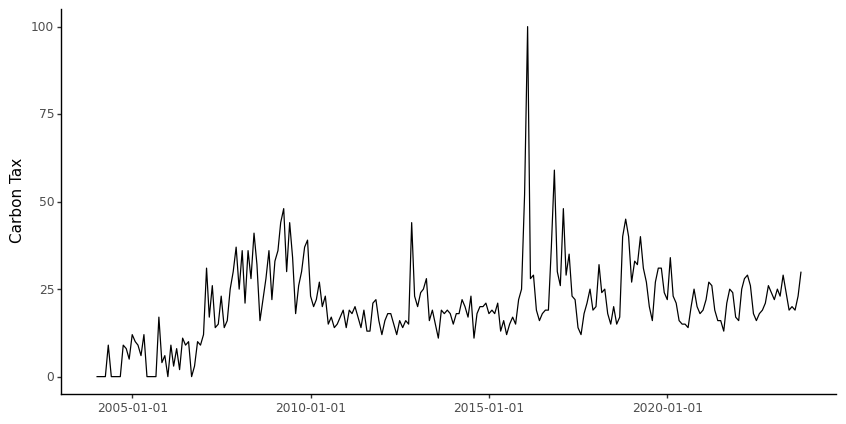

<ggplot: (703923703)>

In [93]:
df_google_trends2 = pd.read_csv("multiTimeline2.csv",skiprows=2, index_col=0, parse_dates=True)

#Rename column to climate change
df_google_trends2 = df_google_trends2.rename(columns={'carbon tax: (United States)': 'Carbon Tax'})

#PLot the google trends data using ggplot
p3 = (ggplot(df_google_trends2, aes(x=df_google_trends2.index, y="Carbon Tax"))+ p9.geom_line() + p9.theme_classic() + p9.theme(figure_size=(10, 5)))
p3

##### i. 
Pick three months where this measure was high. Can you find any news events from those months that might be leading Google searches for climate change to be particularly high? Discuss.

In [94]:
df_google_trends2

,Carbon Tax
Month,
2004-01-01,0
2004-02-01,0
2004-03-01,0
2004-04-01,0
2004-05-01,9
...,...
2023-06-01,19
2023-07-01,20
2023-08-01,19


In [95]:
# Rank the google trends data to find the top 3 dates
df_google_trends2.sort_values(by='Carbon Tax', ascending=False).head(3)

,Carbon Tax
Month,
2016-02-01,100
2016-11-01,59
2016-01-01,52


<span style="color:purple"> Based on above graph and dates, we see the top three dates were February and November and January respectively of 2016. <br>
<br> 
**The Paris Agreement**: In December 2015, the Paris Agreement was adopted, and in 2016, countries around the world were working on implementing their commitments to reduce greenhouse gas emissions. Carbon pricing mechanisms, including carbon taxes, were discussed as a means to achieve these emissions reduction targets. - United Nations <br>
<br>
**Canadian Carbon Pricing** : In 2016, the Canadian government under Prime Minister Justin Trudeau announced its intention to implement a national carbon pricing system. This system would require provinces and territories to either implement their own carbon pricing mechanisms or adopt a federal carbon tax if they did not have an equivalent system in place. This initiative became known as the Pan-Canadian Framework on Clean Growth and Climate Change. - The New York Times <br>
<br>
**U.S. State-Level Initiatives**: While there was no federal carbon tax in the United States in 2016, several states were taking action to implement their own carbon pricing mechanisms. Notable examples included California's cap-and-trade system and the Regional Greenhouse Gas Initiative (RGGI) in the northeastern U.S. - The New York Times <br>
</span>

##### ii. 
Merge the Google Trends data with the data from 49_Industry_Portfolios.csv. For each industry, regress returns on the Google Trends Climate Change topic score. Create a table with three columns: column 1 has the industry name, column 2 has the OLS regression coefficient and column 3 has the p-value for that coefficient. Sort the table from largest to smallest coefficient.

In [96]:
# Merge the google trends data with the industry data
df_merged2 = df.merge(df_google_trends2, left_index=True, right_index=True)
df_merged2

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Carbon Tax
2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,-1.34,...,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87,0
2004-02-01,2.10,6.15,5.79,2.59,3.82,3.42,0.81,1.06,2.99,5.74,...,0.07,2.26,6.75,7.11,2.16,4.21,2.32,2.94,-2.08,0
2004-03-01,4.05,0.74,4.01,-0.21,-4.03,-3.63,2.27,-0.22,1.56,3.33,...,-0.54,2.18,-0.13,0.76,-0.38,-0.63,1.49,-2.16,-5.01,0
2004-04-01,-0.21,3.05,4.66,0.38,1.91,-5.81,-1.81,0.04,2.22,-2.13,...,0.21,0.91,-3.21,-0.83,-5.54,-0.78,-6.85,-7.77,-1.83,0
2004-05-01,1.21,-2.49,2.13,2.25,-12.61,2.89,0.46,0.37,1.52,0.04,...,2.18,0.16,0.71,-3.03,2.54,0.90,2.47,0.60,3.52,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1.20,-6.77,-8.39,-6.76,-6.62,0.70,1.12,-3.50,-6.27,-1.95,...,-6.66,-5.41,-4.72,-4.11,-2.13,-4.44,-3.71,-1.26,-4.72,32
2018-03-01,-4.92,-2.25,-0.41,1.27,-1.65,-9.23,0.52,-0.19,2.13,0.64,...,0.53,-1.04,-3.25,-0.41,-4.62,-2.13,4.55,-1.35,-3.56,24
2018-04-01,7.99,-3.51,-0.79,-4.29,-14.16,6.42,3.09,-0.46,-5.35,3.16,...,0.49,0.82,4.29,3.53,1.11,3.52,-1.29,-1.57,-1.75,25
2018-05-01,1.93,-0.86,-1.30,-1.19,-1.87,0.81,9.61,0.70,-0.25,4.21,...,4.85,1.56,1.37,-1.75,1.08,-1.11,-3.64,0.37,-0.47,18


In [97]:
df_results2 = regression(df_merged2, regressor= 'Carbon Tax')

# Sort the table from largest to smallest coefficient. Note: we are removing the first row because it is the Climate Change regressor itself.
df_results2.sort_values(by='Coefficient', ascending=False)[1:]

,Industry,Coefficient,P-Value
19,FabPr,0.08219,0.08979
26,Gold,0.07233,0.26246
22,Autos,0.03702,0.44354
5,Toys,0.03351,0.36898
28,Coal,0.03155,0.68743
13,Chems,0.03062,0.39010
34,Hardw,0.02593,0.46967
15,Txtls,0.02267,0.68131
38,Paper,0.02193,0.46843
20,Mach,0.02130,0.59192


##### iii. 
Comment on the ordering of the industries. Is it in line with what you would have expected?

<span style="color:purple"> **Positive Coefficients** : Industries with positive coefficients are perceived to benefit or be neutral to discussions on carbon taxes. These could be sectors that are less carbon-intensive or those that might have solutions or products that would benefit from increased carbon taxes. <br>
<br> 
**FabPr**: This suggests that as discussions on carbon tax increase, that Fabricated Products provides alternative solutions that could benefit from a more stringent carbon tax regime or is relatively less affected by it. <br>
<br>
**Gold** : This being second is interesting. One potential explanation could be that gold, as a non-productive asset, might be seen as a safe-haven during times of economic uncertainty, which discussions on carbon tax might bring about for certain sectors. <br>
<br>
**Autos**: Given the push for electric vehicles and reducing carbon footprints, it's possible that positive discussions on carbon tax align with periods where electric or more efficient cars are in demand or being promoted. <br>
<br>
**Coal**: Surprisingly, Coal has a positive coefficient. Given that coal is a significant carbon emitter, one might expect a negative relationship. However, this result could be due to various external factors not accounted for in this analysis or just statistical noise. <br>
<br>
**Negative Coefficients** : Industries with negative coefficients are perceived to be adversely affected by discussions on carbon taxes. These could be sectors that are carbon-intensive and may face increased costs or regulations with higher carbon taxes. <br>
<br>
**Oil**: Oil, being at the bottom, suggests it has the most negative relationship with the carbon tax topic. This is in line with expectations as the oil industry would be one of the most affected by stringent carbon tax policies. <br>
<br>
**Banks, Cnstr, RlEst**: These sectors might have investments or dependencies on carbon-intensive industries, which could explain their negative coefficients. <br>
</span>

#### (b) (25 points) 
Download the Ardia et al. (2020) data from https://sentometrics-research.com/download/mccc/. Focus on the tab “SSRN 2022 version (monthly).” Repeat problem 3a using this data instead of Google Trends. Instead of Google searches for the Climate Change topic, use the column called “Aggregate.” Instead of Google searches for physical and transition risk topics, choose one physical risk-related and one transition-risk related series from the Ardia et al. (2020) data. Try to choose the series that are most closely related to the Google searches you chose above. Comment on the similarities and differences in the industry rankings you find when using the Ardia et al. (2020) compared to the Google data.

### Note: We did not get the SSRN 2022 monthly, so we used the MS 2022 monthly data.

### Repeating 3a for **Climate Change** using the **Aggregate** column from the Ardia et al. (2020) data

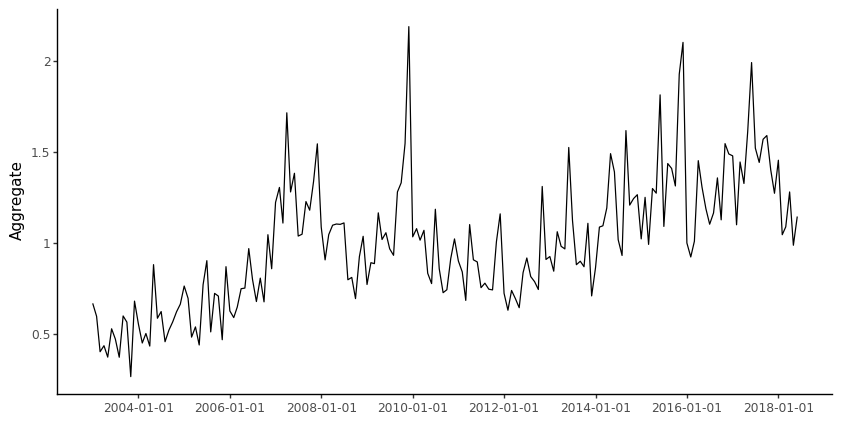

<ggplot: (705509208)>

In [100]:
df_ms_2022 = pd.read_excel("Sentometrics_US_Media_Climate_Change_Index.xlsx", sheet_name="MS 2022 version (monthly)", skiprows=5, index_col=0, parse_dates=True)

#PLot the google trends data using ggplot
p4 = (ggplot(df_ms_2022, aes(x=df_ms_2022.index, y="Aggregate"))+ p9.geom_line() + p9.theme_classic() + p9.theme(figure_size=(10, 5)))
p4

##### i. 
Pick three months where this measure was high. Can you find any news events from those months that might be leading Google searches for climate change to be particularly high? Discuss.

In [102]:
# Rank the google trends data to find the top 3 dates
df_ms_2022.sort_values(by='Aggregate', ascending=False).head(3)[["Aggregate"]]

,Aggregate
Date,
2009-12-01,2.18944
2015-12-01,2.10294
2017-06-01,1.99219


<span style="color:blue"> Based on above graph and dates, we see the top three dates were April of 2022, 2023 and September of 2019. <br>We went ahead and tried to find any news events that might be leading Google searches for climate change to be particularly high. We found the following news articles that might be the reason for the spike in Google searches for climate change.<br>1. The April 2022 global surface temperature was 0.85°C (1.53°F) above the 20th century average and tied with 2010 as the fifth highest for April in the 143-year record. - https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/202204#:~:text=The%20April%202022%20global%20surface,in%20the%20143%2Dyear%20record <br> </span>
<span style="color:purple">2. The Southern Hemisphere had its warmest April and warmest month on record. As ocean temperatures set a record high for the month of April.- https://www.climate.gov/news-features/understanding-climate/global-climate-summary-april-2023#:~:text=Highlights,sea%20ice%20extent%20on% <br>3.Globally, September 2019 was roughly 1.02 degrees Fahrenheit warmer than the average from 1981-2010, "making it the warmest September in our data record, although virtually on a par with 2016," the group said in a statement. -USA TODAY
So it can be seen that the spike in Google searches for climate change is due to the increase in global temperature and global warming related news. </span>

##### ii. 
Merge the Google Trends data with the data from 49_Industry_Portfolios.csv. For each industry, regress returns on the Google Trends Climate Change topic score. Create a table with three columns: column 1 has the industry name, column 2 has the OLS regression coefficient and column 3 has the p-value for that coefficient. Sort the table from largest to smallest coefficient.

In [ ]:
# Merge the google trends data with the industry data
df_merged = df.merge(df_google_trends, left_index=True, right_index=True)
df_merged

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Climate Change
2004-01-01,-2.82,0.94,5.57,-2.90,2.05,-0.11,0.31,1.10,2.19,-1.34,...,-4.07,2.95,-0.20,0.48,2.64,4.72,6.32,3.86,6.87,2
2004-02-01,2.10,6.15,5.79,2.59,3.82,3.42,0.81,1.06,2.99,5.74,...,0.07,2.26,6.75,7.11,2.16,4.21,2.32,2.94,-2.08,4
2004-03-01,4.05,0.74,4.01,-0.21,-4.03,-3.63,2.27,-0.22,1.56,3.33,...,-0.54,2.18,-0.13,0.76,-0.38,-0.63,1.49,-2.16,-5.01,3
2004-04-01,-0.21,3.05,4.66,0.38,1.91,-5.81,-1.81,0.04,2.22,-2.13,...,0.21,0.91,-3.21,-0.83,-5.54,-0.78,-6.85,-7.77,-1.83,2
2004-05-01,1.21,-2.49,2.13,2.25,-12.61,2.89,0.46,0.37,1.52,0.04,...,2.18,0.16,0.71,-3.03,2.54,0.90,2.47,0.60,3.52,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,1.20,-6.77,-8.39,-6.76,-6.62,0.70,1.12,-3.50,-6.27,-1.95,...,-6.66,-5.41,-4.72,-4.11,-2.13,-4.44,-3.71,-1.26,-4.72,7
2018-03-01,-4.92,-2.25,-0.41,1.27,-1.65,-9.23,0.52,-0.19,2.13,0.64,...,0.53,-1.04,-3.25,-0.41,-4.62,-2.13,4.55,-1.35,-3.56,7
2018-04-01,7.99,-3.51,-0.79,-4.29,-14.16,6.42,3.09,-0.46,-5.35,3.16,...,0.49,0.82,4.29,3.53,1.11,3.52,-1.29,-1.57,-1.75,8
2018-05-01,1.93,-0.86,-1.30,-1.19,-1.87,0.81,9.61,0.70,-0.25,4.21,...,4.85,1.56,1.37,-1.75,1.08,-1.11,-3.64,0.37,-0.47,7


In [ ]:
def regression(df, regressor='Climate Change'):
    # Create a dataframe to store the results
    df_results = pd.DataFrame(columns=['Industry', 'Coefficient', 'P-Value'])
    
    # Loop through each industry
    for industry in df.columns:
        # Create a dataframe with the industry and google trends data
        df_industry = df[[industry, regressor]]
        
        # Rename the columns
        df_industry.columns = ['Returns', 'Google Trends']
        
        # Drop any missing values
        df_industry = df_industry.dropna()
        
        # Run the regression
        model = sm.OLS(df_industry['Returns'], sm.add_constant(df_industry['Google Trends']))
        results = model.fit()
        
        # Store the results in the dataframe
        df_results = df_results.append({'Industry': industry, 'Coefficient': results.params['Google Trends'], 'P-Value': results.pvalues['Google Trends']}, ignore_index=True)
        
    return df_results

df_results = regression(df_merged, regressor='Climate Change')

# Sort the table from largest to smallest coefficient. Note: we are removing the first row because it is the Climate Change regressor itself.
df_results.sort_values(by='Coefficient', ascending=False)[1:]

,Industry,Coefficient,P-Value
22,Autos,0.35786,0.16441
18,Steel,0.30430,0.26891
20,Mach,0.23978,0.25753
44,Banks,0.22550,0.25491
19,FabPr,0.22388,0.38807
40,Trans,0.21283,0.19123
28,Coal,0.21261,0.61145
36,Chips,0.20966,0.26276
13,Chems,0.20016,0.29226
37,LabEq,0.18126,0.27668


##### iii. 
Comment on the ordering of the industries. Is it in line with what you would have expected?

<span style="color:blue"> **Industries with Positive Coefficients**: <br>
<br>
**Autos**: This industry has the highest positive coefficient. This suggests that increased interest in climate change on Google Trends may have a positive impact on the automobile industry, possibly due to greater demand for environmentally friendly or electric vehicles.<br>
<br>
**Steel, Mach, Banks, FabPr**: These industries also have positive coefficients, implying that they might benefit from higher climate change awareness. For example, the steel industry might see increased demand for materials used in renewable energy infrastructure.<br>
<br>
<span style="color:purple">
**Trans, Coal, Chips, Chems, LabEq, Aero**: These industries also have positive coefficients but to a slightly lesser degree. They may experience some positive effects from heightened climate change concerns. <br>
<br>
**Industries with Negative Coefficients**: <br>
<br>
**Smoke, Food, Hshld, Util, Smoke**: These industries have negative coefficients, indicating that higher Google Trends Climate Change scores are associated with lower returns. This suggests that industries like tobacco, food, and utilities might face challenges or reduced demand in the context of increasing climate change awareness. For example, tobacco companies could face increased regulatory scrutiny.<br>
<br>For the most part these results align with the expectations. Though, we would not have expected Banks to be one of the highest coefficient industries.
</span>

## 3 Reading Response (15 points)

### Optional for extra credit. Must be completed individually.

Read Lins et al. (2017) and answer the following questions.

#### 1. (5 points) 

Why are the authors particularly interested in studying the performance of socially responsible firms during crisis times (instead of studying performance of these firms more generally)?

#### 2. (5 points) 
Focusing on Section IV, describe the authors’ findings related to the effect of CSR on operating performance and capital raising. Conceptually, explain why CSR would matter for these outcomes during crisis times?

#### 3. (5 points) 

What questions are you left with after reading this paper?